# Customer Churn Analysis
### Team-5
#### Aishwarya Paruchuri
#### Archita Chakraborty
#### Manjushree Barike Rajanna
#### Rohit Chandra

 ** Python statements that import the standard libraries **

In [155]:
import numpy as np

import pandas as pd

In [156]:
#read the csv file in a dataframe
churn_df = pd.read_csv("../data/Customer_churn_raw.csv")

churn_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38.0,0,4370,71.0,5.0,17.0,1,1,5,197.640,177.8760,69.7640,0
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,6,46.035,41.4315,60.0000,0
2,10,0,37.0,0,2453,60.0,359.0,24.0,1,1,2,1536.520,1382.8680,203.6520,0
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,10,240.020,216.0180,74.0020,0
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,9,145.805,131.2245,64.5805,0


In [157]:
#rename the columns
churn_df=churn_df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "seconds_of_use", "Frequency of use": "freq_of_use", "Frequency of SMS": "freq_of_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

In [158]:
#print the columns
churn_df.columns

Index(['call_failure', 'complains', 'subs_len', 'charge_amount',
       'seconds_of_use', 'freq_of_use', 'freq_of_sms', 'distinct_call_nums',
       'tariff_plan', 'status', 'age', 'customer_value', 'FN', 'FP', 'Churn'],
      dtype='object')

## Exploratory Data Analysis

In [159]:
#filter out the 3 columns from the dataframe
cols_3 = churn_df[['call_failure', 'complains', 'subs_len']]

cols_3

,call_failure,complains,subs_len
0,8,0,38.0
1,O,0,39.0
2,10,0,37.0
3,10,0,38.0
4,3,0,NaN
...,...,...,...
3145,21,0,19.0
3146,17,0,17.0
3147,13,0,18.0
3148,7,0,11.0


In [160]:
cols_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   call_failure  3138 non-null   object 
 1   complains     3137 non-null   object 
 2   subs_len      3145 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.0+ KB


In [161]:
cols_3.describe()

,subs_len
count,3145.000000
mean,32.333229
std,9.346742
min,-40.000000
25%,29.000000
50%,35.000000
75%,38.000000
max,47.000000


### Check for null values

In [162]:
#check for null values in 
cols_3.isna().sum()

call_failure    12
complains       13
subs_len         5
dtype: int64

Observation : 

12 null values in call_failure,

13 null values in complains,

5 null values in subs_len

### Data cleaning

In [163]:
cols_3['call_failure'].value_counts()

0             664
5             244
7             166
6             161
8             156
9             149
3             140
2             137
4             133
11            125
10            124
1             121
13             99
12             97
14             85
15             69
16             67
18             53
17             45
20             37
19             33
21             29
23             25
25             21
22             21
28             17
26             17
30             16
24             16
27             13
O              13
32              8
29              7
31              6
o               4
-0.0000009      4
34              3
33              3
35              2
36              2
3$^             1
0.05            1
0.000001        1
O'              1
ooo             1
-0.05           1
Name: call_failure, dtype: int64

**Observation:** Since the data is not consistent, we'll replace these values

In [164]:
cols_3['call_failure'] = pd.to_numeric(cols_3['call_failure'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
#replace null values with 0
cols_3["call_failure"].replace(np.nan, 0, inplace=True )

D:\IDEs\Anaconda\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [166]:
cols_3['complains'].value_counts()

0            2859
1             231
OO             18
o              12
O               7
-1              4
11              1
-112            1
-11             1
1999            1
18-             1
111111111       1
Name: complains, dtype: int64

 **Observation:** Since complains is boolean type we will chave to replace with weither 0 or 1

In [167]:
cols_3['complains'] = pd.to_numeric(cols_3['complains'].astype(str), errors='coerce').fillna(0).astype(int)

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:
cols_3['complains'].value_counts()

 0            2910
 1             231
-1               4
 11              1
-112             1
-11              1
 1999            1
 111111111       1
Name: complains, dtype: int64

In [169]:
cols_3.loc[cols_3['complains'] != 0, 'complains'] = 1

D:\IDEs\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [170]:
# Verification
cols_3['complains'].value_counts()

0    2910
1     240
Name: complains, dtype: int64

In [171]:
#replace all the null values with 1
cols_3["call_failure"].replace(np.nan, 1, inplace=True )

In [172]:
#Clean the subscription length column
cols_3['subs_len'].value_counts()

 36.0000    272
 38.0000    257
 37.0000    226
 35.0000    225
 34.0000    201
 39.0000    198
 40.0000    182
 33.0000    152
 32.0000    121
 41.0000    110
 31.0000    104
 30.0000     80
 42.0000     80
 29.0000     73
 28.0000     59
 27.0000     56
 43.0000     56
 25.0000     52
 26.0000     45
 44.0000     44
 24.0000     40
 23.0000     39
 17.0000     32
 15.0000     31
 18.0000     30
 16.0000     30
 19.0000     29
 20.0000     28
 22.0000     26
 11.0000     26
 21.0000     25
 14.0000     25
 13.0000     24
 45.0000     23
 9.0000      22
 7.0000      19
 12.0000     19
 10.0000     16
 46.0000     13
 8.0000      12
 3.0000       8
 6.0000       8
 5.0000       6
 4.0000       4
 36.0009      4
-35.0000      3
-37.0000      3
-40.0000      3
 39.0010      3
 47.0000      1
Name: subs_len, dtype: int64

In [173]:
cols_3['subs_len'] = cols_3['subs_len'].abs()

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
cols_3['subs_len'].value_counts()

36.0000    272
38.0000    257
37.0000    229
35.0000    228
34.0000    201
39.0000    198
40.0000    185
33.0000    152
32.0000    121
41.0000    110
31.0000    104
30.0000     80
42.0000     80
29.0000     73
28.0000     59
43.0000     56
27.0000     56
25.0000     52
26.0000     45
44.0000     44
24.0000     40
23.0000     39
17.0000     32
15.0000     31
16.0000     30
18.0000     30
19.0000     29
20.0000     28
22.0000     26
11.0000     26
14.0000     25
21.0000     25
13.0000     24
45.0000     23
9.0000      22
12.0000     19
7.0000      19
10.0000     16
46.0000     13
8.0000      12
3.0000       8
6.0000       8
5.0000       6
36.0009      4
4.0000       4
39.0010      3
47.0000      1
Name: subs_len, dtype: int64

In [175]:
cols_3['subs_len'].fillna(value=cols_3['subs_len'].mean(), inplace=True)

D:\IDEs\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [178]:
cols_3['subs_len'] = cols_3['subs_len'].astype(int)

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
cols_3.dtypes

call_failure    int32
complains       int32
subs_len        int32
dtype: object

In [180]:
cols_3['subs_len'].value_counts()

36    276
38    257
37    229
35    228
34    201
39    201
40    185
33    152
32    126
41    110
31    104
30     80
42     80
29     73
28     59
27     56
43     56
25     52
26     45
44     44
24     40
23     39
17     32
15     31
18     30
16     30
19     29
20     28
11     26
22     26
21     25
14     25
13     24
45     23
9      22
7      19
12     19
10     16
46     13
8      12
3       8
6       8
5       6
4       4
47      1
Name: subs_len, dtype: int64

In [181]:
# Verification for null values

cols_3.isna().sum()

call_failure    0
complains       0
subs_len        0
dtype: int64

In [ ]:
** Reading file using pandas read_table function **

In [10]:
df = pd.read_csv('../data/Customer_churn_raw.csv')
display(df)
    
  

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38.0,0,4370,71.0,5.0,17.0,1,1,5,197.640,177.8760,69.7640,0
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,6,46.035,41.4315,60.0000,0
2,10,0,37.0,0,2453,60.0,359.0,24.0,1,1,2,1536.520,1382.8680,203.6520,0
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,10,240.020,216.0180,74.0020,0
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,9,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19.0,2,6697,147.0,92.0,44.0,2,1,68,721.980,649.7820,122.1980,0
3146,17,0,17.0,1,9237,177.0,80.0,42.0,1,1,65,261.210,235.0890,76.1210,0
3147,13,0,18.0,4,3157,-51.0,38.0,21.0,1,1,64,280.320,252.2880,78.0320,0
3148,7,0,11.0,2,4695,46.0,222.0,12.0,1,1,62,1077.640,969.8760,157.7640,0


** Check number of null values in each columns **

In [14]:
df['Customer Value'].isnull().sum()
    

0

** Replace null values **

In [15]:
df["Customer Value"].replace(np.nan, 0, inplace=True )
df['Customer Value'].isnull().sum()

0

** Correlation with 'Customer value' and 'Churn'**

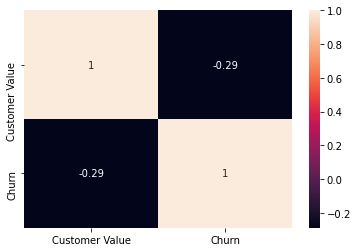

In [16]:
df = pd.DataFrame(df, columns=['Customer Value','Churn'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
    